Target accessible using at least 10.0 steps


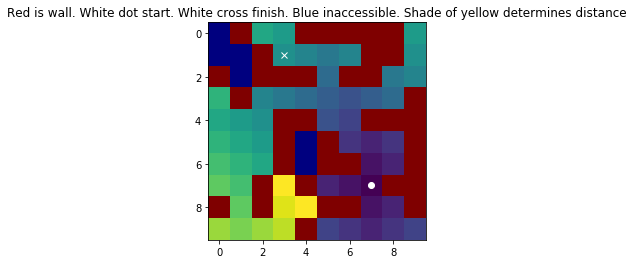

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

###########################
# Generate Labyrinth
###########################
NROW = 10
NCOL = 10
pbad = 0.3
lab = np.random.uniform(0, 1, (NROW, NCOL)) < pbad
x0 = np.random.randint(0, NCOL)
y0 = np.random.randint(0, NROW)
xf = np.random.randint(0, NCOL)
yf = np.random.randint(0, NROW)
lab[y0, x0] = 0
lab[yf, xf] = 0

###########################
# Check if target accessible using BFS
###########################
dist = np.nan * np.ones(lab.shape)
tasks = deque([(x0, y0, 0)])

validmove = lambda x,y: (x>=0)and(y>=0)and(x<NCOL)and(y<NROW)and(lab[y,x] == 0)

while len(tasks) > 0:
    x,y,d = tasks.popleft()
    if validmove(x,y) and np.isnan(dist[y,x]):
        dist[y,x] = d
        tasks.append((x-1, y, d+1))
        tasks.append((x, y-1, d+1))
        tasks.append((x+1, y, d+1))
        tasks.append((x, y+1, d+1))

if np.isnan(dist[yf, xf]):
    print("Target inaccessible from source")
else:
    print("Target accessible using at least", dist[yf, xf], "steps")
            
plt.figure()
plt.title("Red is wall. White dot start. White cross finish. Blue inaccessible. Shade of yellow determines distance")
plt.imshow(lab, cmap='jet')
plt.imshow(dist)
plt.plot([x0], [y0], 'o', color='white')
plt.plot([xf], [yf], 'x', color='white')
plt.show()

In [124]:
########################
# TD LEARNING
########################

# Constants
alpha = 0.1  # Learning rate
R0 = 1        # Max reward
gamma = 0.9   # Discount factor

# Value function - determines how good it is to be in each state
value = np.zeros(lab.shape)

# Policy - determines probability of choosing this state, given its value
calc_p_move = lambda x,y: np.exp(5*value[y, x]) if validmove(x,y) else 0

# choose direction by softmax of values
def makemove(x, y):
    moves = [(x-1, y), (x+1, y), (x,y-1), (x,y+1)]
    p = np.array([calc_p_move(*move) for move in moves])
    p /= np.sum(p)
    moveidx = np.random.choice(4, p=p)
    return moves[moveidx]

x, y = x0, y0
reward_times = []
for iStep in range(20000):
    xnew, ynew = makemove(x, y)
    reward_this = R0 * int((x,y) == (xf, yf))
    value[y, x] += alpha*(reward_this + gamma * value[ynew, xnew] - value[y, x])
    if reward_this > 0:
#         print("Got reward at step", iStep)
        reward_times += [iStep]
        x,y = x0, y0
    else:
        x,y = xnew, ynew

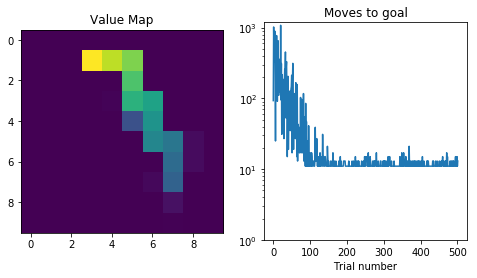

In [125]:
reward_delta = [reward_times[i] - reward_times[i-1] for i in range(1, len(reward_times))]

fig, ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].imshow(value)
ax[1].semilogy(reward_delta)
ax[1].set_ylim([1, 1.1*np.max(reward_delta)])
ax[0].set_title("Value Map")
ax[1].set_title("Moves to goal")
ax[1].set_xlabel("Trial number")
plt.show()